In [17]:
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])

# random state
rs = 142

# sizes for learning curves
split_sizes = np.linspace(0.2, 1.0, 9)
print(split_sizes)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


<h2>Data Import, Cleaning, and Setup</h2>

In [2]:
# import datasets
df = pd.read_csv("datasets/online_shoppers_intention.csv")

In [3]:
pd.set_option("display.max_rows", None)
print(df.info())
df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.000000,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.000000,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.000000,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.000000,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
print(df.shape)
df.isna().any().any()

(12330, 18)


False

In [5]:
for col in df:
  print(df[col].unique())

[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
[  0.   120.    16.   ... 547.75 368.25 211.25]
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99 362
 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121 107
 305 199 4

In [6]:
# VisitorType -> New_Visitor is 0, Returning_Visitor is 1 (drop rows with "Other" because value is unspecified)
df.loc[df["VisitorType"] == "New_Visitor", "VisitorType"] = True
df.loc[df["VisitorType"] == "Returning_Visitor", "VisitorType"] = False
df.drop(df[df.VisitorType == "Other"].index, inplace=True)
df.drop(columns=['Month'], inplace=True)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  OperatingSystems         12245 non-null  int64  
 11  Browser                  12245 non-null  int64  
 12  Region                   12245 non-null  int64  
 13  TrafficType              12245 non-null  int64  
 14  VisitorType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,2.321029,80.944413,0.505839,34.630576,31.865169,1199.080153,0.022078,0.042932,5.803858,0.061854,2.098326,2.311719,3.121437,4.002858
std,3.326056,176.579347,1.272970,141.137281,44.548083,1916.732843,0.048201,0.048378,18.075511,0.199540,0.825893,1.574388,2.375767,3.898928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.250000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.583333,0.003175,0.025137,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.600000,0.000000,0.000000,38.000000,1472.000000,0.016923,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.head(75)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False,False
1,0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False,False
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False,False
3,0,0.000000,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False,False
4,0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,False,True,False
5,0,0.000000,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,2,2,1,3,False,False,False
6,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,4,3,3,False,False,False
7,1,0.000000,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,1,2,1,5,False,True,False
8,0,0.000000,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,2,2,2,3,False,False,False
9,0,0.000000,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,2,4,1,2,False,False,False


In [9]:
print(len(df[(df['Revenue']==1)]))
print(len(df[(df['Revenue']==0)]))

# should use f1 score for imbalanced datasets. 10 fold more no revenue than positive revenue

1892
10353


In [10]:
# split into train, validation and testing sets
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1 ] # Revenue is class label
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = rs, shuffle = True)
y_train.dtype

dtype('bool')

<h2>Decision Tree</h2>

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Max Depth Range: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Train Scores Mean:
[0.66440176 0.55805785 0.64329052 0.61740826 0.65468706 0.67551246
 0.71058188 0.73973294 0.78025456 0.81467238 0.85181977 0.88245717
 0.90831341 0.92971735 0.94725147 0.96154363 0.97200159 0.97975558
 0.98644999 0.99112694]
Train Scores Std:
[0.00263388 0.02498218 0.02504918 0.01335193 0.02191863 0.00944413
 0.0110059  0.01077381 0.00668833 0.00808433 0.00672976 0.004963
 0.00576714 0.00674794 0.00570327 0.00605397 0.00483662 0.00502003
 0.00379954 0.00307783]
Test Scores Mean:
[0.66262915 0.54404106 0.62311114 0.59660928 0.61033752 0.60414714
 0.59608597 0.59174534 0.58904484 0.57882974 0.56782225 0.55644074
 0.55339884 0.55000298 0.54667984 0.54499806 0.53455744 0.53900441
 0.54247449 0.53484968]
Test Scores Std:
[0.02370479 0.0325481  0.03889719 0.02535802 0.03594881 0.03166969
 0.03248991 0.03401311 0.02676649 0.02872798 0.03368779 0.02980428
 0.03543348 0.0397418

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.9s finished


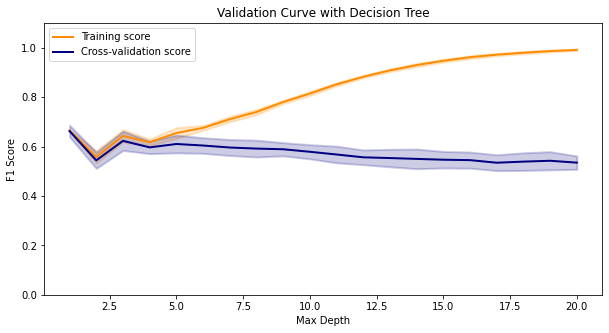

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


range(1, 1001)


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  1.8min finished


Leaf Size Range: range(1, 1001)
Train Scores Mean:
[1.         0.91868348 0.88228675 0.83613305 0.82014731 0.79308599
 0.77942283 0.76686554 0.75897978 0.74709684 0.74078081 0.73150842
 0.72495533 0.72016796 0.71570109 0.71050557 0.71158986 0.70753263
 0.70417838 0.70292085 0.70060796 0.69757113 0.6965014  0.69337809
 0.69263151 0.68985164 0.68973545 0.68657838 0.68674141 0.68194364
 0.68186201 0.68098654 0.68009505 0.6759225  0.67487505 0.67325521
 0.67355187 0.67258877 0.67005831 0.67063361 0.66921578 0.66683309
 0.66643856 0.66337999 0.66361124 0.66334239 0.66247813 0.66122913
 0.65861712 0.65760635 0.65912288 0.65776898 0.65781083 0.65753705
 0.65398311 0.65560752 0.654587   0.65576287 0.65456842 0.6521683
 0.65327446 0.65455697 0.65611231 0.65513269 0.65513269 0.6546613
 0.65570708 0.65659861 0.6557442  0.65514351 0.65673073 0.65525615
 0.65634709 0.65537586 0.65704654 0.65705222 0.65705222 0.65750298
 0.65894028 0.65966056 0.66009004 0.66086292 0.65945553 0.65945553
 0.65929829 0

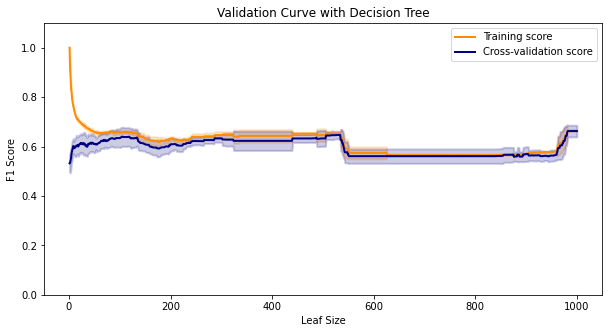

In [16]:
# Plot cross validation curves for Max Depth and Leaf Size hyperparameters

#### Max Depth
param_range = np.linspace(1, 20, 20)
print(param_range)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), x_train, y_train, param_name="max_depth", 
    param_range=param_range, n_jobs=-1,
    scoring='f1', verbose=1, cv=10
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print("Max Depth Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Test Scores Mean:")
print(test_scores_mean)
print("Test Scores Std:")
print(test_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


#### Leaf Size
param_range = range(1,301)
print(param_range)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), x_train, y_train, param_name="min_samples_leaf", 
    param_range=param_range, n_jobs=-1,
    scoring='f1', verbose=1, cv=10
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print("Leaf Size Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Test Scores Mean:")
print(test_scores_mean)
print("Test Scores Std:")
print(test_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Leaf Size")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


# # hyperparameter tuning
param_grid = {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 301)}
tuned = GridSearchCV(estimator = DecisionTreeClassifier(random_state = rs), param_grid = param_grid, cv=10)

start_time = time.time()
tuned.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned.best_score_
best_params = tuned.best_params_


# # plot learning curve for best params
tuned = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=rs)
# # learning_curve_plot = LearningCurve(tuned, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)
# learning_curve_plot.fit(x_data,y_data)
# learning_curve_plot.show()
        
        

<h2>Neural Network</h2>

<h2>Boosting</h2>

<h2>Support Vector Machines</h2>

<h2>k-Nearest Neighbor</h2>

<h2>Plots and Analysis</h2>